<a href="https://colab.research.google.com/github/hosankang/AI_Class/blob/master/Regularizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,BatchNormalization,Activation
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

In [0]:
# 데이터 로드
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# 레이블 정의
fashion_mnist_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat",
                        "Sandal",     "Shirt",  "Sneaker", "Bag",  "Ankle boot"]

#데이터 전처리
x_train = x_train / 255.0
x_test = x_test / 255.0

# Batch Normalization 기법


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 93us/step - loss: 0.6316 - acc: 0.8287 - val_loss: 0.5200 - val_acc: 0.8418
Epoch 2/20
60000/60000 [==============================] - 4s 72us/step - loss: 0.4375 - acc: 0.8653 - val_loss: 0.4500 - val_acc: 0.8508
Epoch 3/20
60000/60000 [==============================] - 4s 72us/step - loss: 0.3736 - acc: 0.8793 - val_loss: 0.4127 - val_acc: 0.8611
Epoch 4/20
60000/60000 [==============================] - 4s 74us/step - loss: 0.3380 - acc: 0.8864 - val_loss: 0.4548 - val_acc: 0.8451
Epoch 5/20
60000/60000 [==============================] - 4s 72us/step - loss: 0.3130 - acc: 0.8915 - val_loss: 0.3877 - val_acc: 0.8684
Epoch 6/20
60000/60000 [==============================] - 4s 71us/step - loss: 0.2909 - acc: 0.8991 - val_loss: 0.3649 - val_acc: 0.8731
Epoch 7/20
60000/60000 [==============================] - 4s 72us/step - loss: 0.2752 - acc: 0.9043 - val_loss: 0.3821 - val_acc

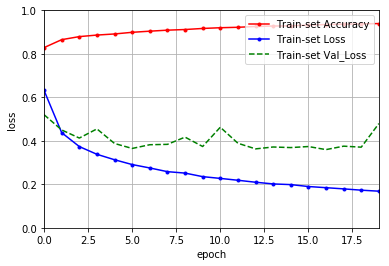

In [17]:
#레이어 설정(크기 28, 28, relu Activation)
model_batch = Sequential()
model_batch.add(Flatten(input_shape=(28, 28)))
model_batch.add(Dense(128))
model_batch.add(BatchNormalization())
model_batch.add(Activation('relu'))
model_batch.add(Dense(10))
model_batch.add(BatchNormalization())
model_batch.add(Activation('softmax'))

#컴파일(Adam Optimizer, Cross Entropy)
model_batch.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

#훈련 
history_batch = model_batch.fit(x_train, y_train,batch_size=64,validation_data=(x_test,y_test),epochs=20)

# 테스트 셋을 통해 모델 평가 및 정확도
score = model_batch.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])

#epochs당 loss 변화 그래프

plt.figure('Batch Normalization')

y_acc_batch = history_batch.history['acc']
y_loss_batch = history_batch.history['loss']
val_loss_batch = history_batch.history['val_loss']

x_len = np.arange(len(y_loss_batch))
plt.plot(x_len, y_acc_batch, marker='.', c='red', label="Train-set Accuracy")
plt.plot(x_len, y_loss_batch, marker='.', c='blue', label="Train-set Loss")
plt.plot(x_len, val_loss_batch, 'g--', label="Train-set Val_Loss")
plt.axis([0,19,0,1])
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()


#Dropout 기법

W0729 12:42:49.235749 140482148935552 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 66us/step - loss: 0.8432 - acc: 0.6917 - val_loss: 0.5439 - val_acc: 0.7984
Epoch 2/20
60000/60000 [==============================] - 3s 58us/step - loss: 0.6150 - acc: 0.7763 - val_loss: 0.4923 - val_acc: 0.8240
Epoch 3/20
60000/60000 [==============================] - 3s 55us/step - loss: 0.5712 - acc: 0.7907 - val_loss: 0.4669 - val_acc: 0.8300
Epoch 4/20
60000/60000 [==============================] - 3s 54us/step - loss: 0.5455 - acc: 0.7991 - val_loss: 0.4588 - val_acc: 0.8357
Epoch 5/20
60000/60000 [==============================] - 3s 56us/step - loss: 0.5274 - acc: 0.8077 - val_loss: 0.4464 - val_acc: 0.8369
Epoch 6/20
60000/60000 [==============================] - 3s 56us/step - loss: 0.5195 - acc: 0.8097 - val_loss: 0.4317 - val_acc: 0.8417
Epoch 7/20
60000/60000 [==============================] - 3s 55us/step - loss: 0.5100 - acc: 0.8108 - val_loss: 0.4234 - val_acc

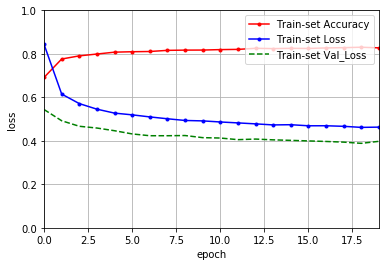

In [9]:
#레이어 설정 (입력과 히든레이어에 각각 0.5씩 드롭아웃 시켜준다
model_drop = Sequential()
model_drop.add(Flatten(input_shape=(28, 28)))
model_drop.add(Dropout(0.5))
model_drop.add(Dense(128,activation='relu'))
model_drop.add(Dropout(0.5))
model_drop.add(Dense(10,activation='softmax'))

#컴파일(Adam Optimizer, Cross Entropy)
model_drop.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

#훈련 
history_drop = model_drop.fit(x_train, y_train,batch_size=128,epochs=20,validation_data=(x_test,y_test))

# 테스트 셋을 통해 모델 평가 및 정확도
score = model_drop.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])

#epochs당 loss 변화 그래프

plt.figure('Dropout')

y_acc_drop = history_drop.history['acc']
y_loss_drop = history_drop.history['loss']
val_loss_drop = history_drop.history['val_loss']

x_len = np.arange(len(y_loss_drop))
plt.plot(x_len, y_acc_drop, marker='.', c='red', label="Train-set Accuracy")
plt.plot(x_len, y_loss_drop, marker='.', c='blue', label="Train-set Loss")
plt.plot(x_len, val_loss_drop, 'g--', label="Train-set Val_Loss")
plt.axis([0,19,0,1])
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

#Data Augmentation 기법

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (60000, 1, 28, 28) (28 channels).
  str(self.x.shape[channels_axis]) + ' channels).')


Epoch 1/200
1/1 [==============================] - 1s 1s/step - loss: 2.4647 - acc: 0.1094 - val_loss: 2.3065 - val_acc: 0.1580
Epoch 2/200
1/1 [==============================] - 0s 263ms/step - loss: 2.3061 - acc: 0.2188 - val_loss: 2.1988 - val_acc: 0.1787
Epoch 3/200
1/1 [==============================] - 0s 272ms/step - loss: 2.2346 - acc: 0.1250 - val_loss: 2.1105 - val_acc: 0.2133
Epoch 4/200
1/1 [==============================] - 0s 272ms/step - loss: 2.2121 - acc: 0.1875 - val_loss: 2.0117 - val_acc: 0.2721
Epoch 5/200
1/1 [==============================] - 0s 270ms/step - loss: 2.0866 - acc: 0.2344 - val_loss: 1.9192 - val_acc: 0.3488
Epoch 6/200
1/1 [==============================] - 0s 259ms/step - loss: 1.9423 - acc: 0.4219 - val_loss: 1.8354 - val_acc: 0.4289
Epoch 7/200
1/1 [==============================] - 0s 275ms/step - loss: 1.8716 - acc: 0.3750 - val_loss: 1.7700 - val_acc: 0.4391
Epoch 8/200
1/1 [==============================] - 0s 270ms/step - loss: 1.8252 - acc:

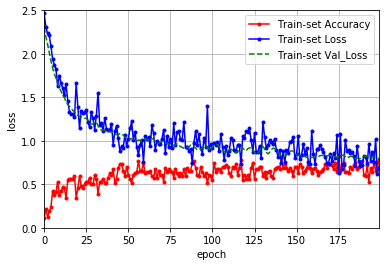

In [15]:
#데이터 확장
dataAug = ImageDataGenerator(rotation_range=40, width_shift_range=0.2,
           height_shift_range=0.2, shear_range=0.2,horizontal_flip=True)
x_train_DA=x_train.reshape(x_train.shape[0],1,28,28) #차원을 3에서 4로 확장
x_test_DA=x_test.reshape(x_test.shape[0],1,28,28)

#레이어 설정
model_DA = Sequential()
model_DA.add(Flatten(input_shape=(1,28, 28)))
model_DA.add(Dense(128,activation='relu'))
model_DA.add(Dense(10,activation='softmax'))

#컴파일
model_DA.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

#확장된 데이터 훈련하기
history_DA = model_DA.fit_generator(dataAug.flow(x_train_DA,y_train,batch_size=64),steps_per_epoch=1, epochs=200,validation_data=(x_test_DA,y_test))

# 테스트 셋을 통해 모델 평가 및 정확도
score = model_DA.evaluate(x_test_DA, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])

#epochs당 loss 변화 그래프
plt.figure('Data Augmentation')
y_acc_DA = history_DA.history['acc']
y_loss_DA = history_DA.history['loss']
val_loss_DA = history_DA.history['val_loss']

x_len = np.arange(len(y_loss_DA))
plt.plot(x_len, y_acc_DA, marker='.', c='red', label="Train-set Accuracy")
plt.plot(x_len, y_loss_DA, marker='.', c='blue', label="Train-set Loss")
plt.plot(x_len, val_loss_DA, 'g--', label="Train-set Val_Loss")

plt.axis([0,199,0,2.5])
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()



#Ensemble 기법

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 88us/step - loss: 0.5187 - acc: 0.8194 - val_loss: 0.4307 - val_acc: 0.8508
Epoch 2/20
60000/60000 [==============================] - 5s 77us/step - loss: 0.3884 - acc: 0.8612 - val_loss: 0.4064 - val_acc: 0.8556
Epoch 3/20
60000/60000 [==============================] - 5s 84us/step - loss: 0.3482 - acc: 0.8749 - val_loss: 0.3916 - val_acc: 0.8549
Epoch 4/20
60000/60000 [==============================] - 5s 80us/step - loss: 0.3224 - acc: 0.8829 - val_loss: 0.3656 - val_acc: 0.8681
Epoch 5/20
60000/60000 [==============================] - 5s 80us/step - loss: 0.3027 - acc: 0.8894 - val_loss: 0.3589 - val_acc: 0.8703
Epoch 6/20
60000/60000 [==============================] - 5s 76us/step - loss: 0.2881 - acc: 0.8933 - val_loss: 0.3474 - val_acc: 0.8763
Epoch 7/20
60000/60000 [==============================] - 4s 73us/step - loss: 0.2756 - acc: 0.8982 - val_loss: 0.3414 - val_acc

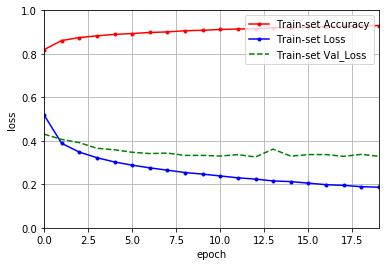

In [12]:
#모델 3개를 독립적으로 만듬
model1 = Sequential()
model1.add(Flatten(input_shape=(28, 28)))
model1.add(Dense(128,activation='relu'))
model1.add(Dense(10,activation='softmax'))

model2 = Sequential()
model2.add(Flatten(input_shape=(28, 28)))
model2.add(Dense(128,activation='relu'))
model2.add(Dense(10,activation='softmax'))

model3 = Sequential()
model3.add(Flatten(input_shape=(28, 28)))
model3.add(Dense(128,activation='relu'))
model3.add(Dense(10,activation='softmax'))

#3개 모델 컴파일
model1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model3.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

#3개 모델 훈련 및 히스토리 정보

history1 = model1.fit(x_train, y_train,batch_size=64,epochs=20,validation_data=(x_test,y_test))
history2 = model2.fit(x_train, y_train,batch_size=64,epochs=20,validation_data=(x_test,y_test))
history3 = model3.fit(x_train, y_train,batch_size=64,epochs=20,validation_data=(x_test,y_test))

# 테스트 셋을 통해 모델 평가 및 정확도
score1 = model1.evaluate(x_test, y_test, verbose=0)
score2 = model2.evaluate(x_test, y_test, verbose=0)
score3 = model3.evaluate(x_test, y_test, verbose=0)

print('Test accuracy1:', score1[1])
print('Test accuracy2:', score2[1])
print('Test accuracy3:', score3[1])

#predict한 값들을 더한 후 나눠서 실제 테스트 라벨과 비교 카운트 후 정확도 측정
predictions1 = model1.predict(x_test)
predictions2 = model2.predict(x_test)
predictions3 = model3.predict(x_test)
predictions = (predictions1 + predictions2 + predictions3)/3.0

count = 0
for i in range(0,10000):
    predictions_label = np.argmax(predictions[i])
    if predictions_label == y_test[i]:
        count= count+1
    i = i+1
count= count/10000.0
print('Total accuracy: ', count)

#epochs당 loss 변화 그래프
plt.figure('Ensemble')

y_acc_En = (history1.history['acc'] + history2.history['acc'] + history3.history['acc'])
y_loss_En = (history1.history['loss'] + history2.history['loss']+history3.history['loss'])
val_loss_En = (history1.history['val_loss']+history2.history['val_loss']+history3.history['val_loss'])

x_len = np.arange(len(y_loss_En))
plt.plot(x_len, y_acc_En, marker='.', c='red', label="Train-set Accuracy")
plt.plot(x_len, y_loss_En, marker='.', c='blue', label="Train-set Loss")
plt.plot(x_len, val_loss_En, 'g--', label="Train-set Val_Loss")
plt.axis([0,19,0,1])
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

#Early Stopping 기법 
### 많은 시간을 들여 도전해 봤지만.. 이번에는 성공하지 못해서 일단은 callback방식을 사용했습니다.
### 다음에 callback을 사용하지 않고 풀수 있도록 도전해 보겠습니다. 

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 90us/step - loss: 0.5239 - acc: 0.8187 - val_loss: 0.4512 - val_acc: 0.8407
Epoch 2/20
60000/60000 [==============================] - 4s 74us/step - loss: 0.3906 - acc: 0.8608 - val_loss: 0.4266 - val_acc: 0.8443
Epoch 3/20
60000/60000 [==============================] - 5s 76us/step - loss: 0.3523 - acc: 0.8728 - val_loss: 0.3940 - val_acc: 0.8597
Epoch 4/20
60000/60000 [==============================] - 5s 79us/step - loss: 0.3253 - acc: 0.8815 - val_loss: 0.3644 - val_acc: 0.8698
Epoch 5/20
60000/60000 [==============================] - 5s 79us/step - loss: 0.3064 - acc: 0.8881 - val_loss: 0.3573 - val_acc: 0.8708
Epoch 6/20
60000/60000 [==============================] - 5s 81us/step - loss: 0.2900 - acc: 0.8938 - val_loss: 0.3555 - val_acc: 0.8751
Epoch 7/20
60000/60000 [==============================] - 5s 79us/step - loss: 0.2793 - acc: 0.8963 - val_loss: 0.3605 - val_acc

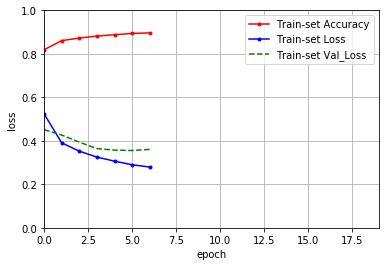

In [14]:
#콜백함수 사용ㅠㅠ
from keras.callbacks import EarlyStopping 

#레이어 설정(크기 28, 28, relu Activation)
model_ES = Sequential()
model_ES.add(Flatten(input_shape=(28, 28)))
model_ES.add(Dense(128,activation='relu'))
model_ES.add(Dense(10,activation='softmax'))

#Early_stopping
early_stopping = EarlyStopping()

#컴파일(Adam Optimizer, Cross Entropy)
model_ES.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

#훈련
history_ES = model_ES.fit(x_train, y_train,batch_size=64,epochs=20,validation_data=(x_test,y_test),callbacks=[early_stopping])

# 테스트 셋을 통해 모델 평가 및 정확도
score = model_ES.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])

#epochs당 loss 변화 그래프
plt.figure('Early Stopping')

y_acc_ES = history_ES.history['acc']
y_loss_ES = history_ES.history['loss']
val_loss_ES = history_ES.history['val_loss']

x_len = np.arange(len(y_loss_ES))
plt.plot(x_len, y_acc_ES, marker='.', c='red', label="Train-set Accuracy")
plt.plot(x_len, y_loss_ES, marker='.', c='blue', label="Train-set Loss")
plt.plot(x_len, val_loss_ES, 'g--', label="Train-set Val_Loss")
plt.axis([0,19,0,1])
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

##5개 기법 Validation loss 값 비교 그래프


ValueError: ignored

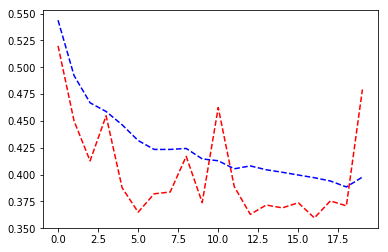

In [18]:
plt.figure('Loss 비교')
plt.plot(x_len, val_loss_batch, 'r--', label="batchnormalization Val_Loss")
plt.plot(x_len, val_loss_drop, 'b--', label="dropout Val_Loss")
plt.plot(x_len, val_loss_DA, 'g--', label="dataaug Val_Loss")
plt.plot(x_len, val_loss_En, 'y--', label="ensemble Val_Loss")
plt.plot(x_len, val_loss_ES, 'k--', label="earlystopping Val_Loss")
plt.axis([0,30,0,2])
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()